AI project with ANN Algorthim

In [10]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

In [11]:
train_df = pd.read_csv('emnist-balanced-train.csv',header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Each column after represents one pixel value (784 total for a 28 x 28 image) 

In [12]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
train_df.shape

(112800, 785)

`

# We have 112800 rows (images), each described using 784 variables 28X28 pixels plus one column as output variable (the first column)

Creating label dictionary
The output variables' values comprise of 0 to 46 values where 0-9 stands for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stand for lowercase alphabets. We will thus create a dictionary which will have these as key and value pairs.

In our dataset, there is a file emnist-balanced-mapping which contains the characters and their ASCII equivalents. We can have the index column as the key of the dictionary and the value ASCII code converted to char as the value of the dictionary.

In [14]:
label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
label_map.head()

C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_16616\409051872.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [15]:
label_dictionary = {}#Running a loop for ASCII equivalent to character conversion -->
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [52]:
train_df_new = train_df[train_df[0].isin(np.arange(0, 36))]
train_df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train_df_new[0].describe()

count    86400.000000
mean        17.500000
std         10.388355
min          0.000000
25%          8.750000
50%         17.500000
75%         26.250000
max         35.000000
Name: 0, dtype: float64

Reset the index of the DataFrame.


In [54]:
train_df_new.reset_index(inplace=True)
train_df_new

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x_train = train_df_new.loc[:, 1:]
y_train = train_df_new.loc[:, 0]

x_train.shape, y_train.shape

((86400, 784), (86400,))

# Visualising Sample data

In [78]:
sample_image = x_train.iloc[48] #input number for any loc you want  for exmaple=[28,30,18,22,55.....] 
sample_label = y_train.iloc[48] 
sample_image.shape, sample_label

((784,), 32)

Label entry  is :  W


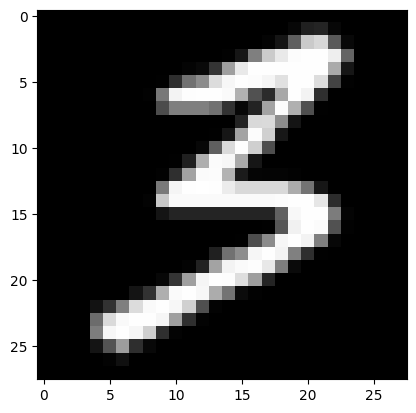

In [79]:
print("Label entry  is : ", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

# a function to rotate and flip and see if it works on the sample image.

Label entry is :  P


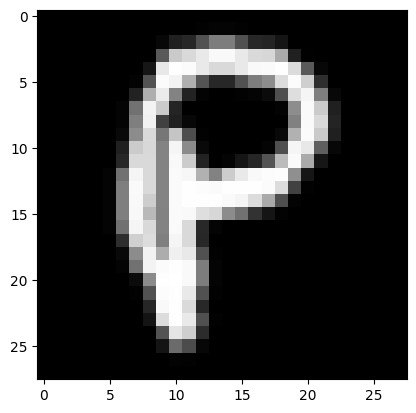

In [37]:
def flip_and_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry is : ", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

 # reshape_and_rotate to all images in X_train

In [38]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train.shape

(86400, 28, 28)

 # Normalizing the Data

In [39]:
x_train = x_train.astype('float32') / 255#Data Scaling to bring the input values between 0 to 1

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.03529412, 0.1254902 ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1333

In [40]:
number_of_classes = y_train.nunique()
number_of_classes

36

In [41]:
y_train = np_utils.to_categorical(y_train,number_of_classes)#Converts a class vector (integers) to binary class matrix
y_train.shape

(86400, 36)

In [42]:
x_train.shape

(86400, 28, 28)

# Reshaping the train data

As tensorflow requires 4D Array, (batch X width X height X channel) and our x_train is 3D array (no. of images X width X height), we will be adding one more dimension to the x_train

In [43]:
x_train = x_train.reshape(-1,28,28, 1)
x_train.shape

(86400, 28, 28, 1)

# Split arrays or matrices into random train and test subsets.


random_state : Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state=88)

# Train and Validation Split

We will be dividing the input dataset into train and validation in the ratio of 75:25 for Model Building

In [45]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [46]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [47]:
history = model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1,  validation_split=0.25, callbacks=[early_stopping, mcp_save])

Epoch 1/15
1518/1519 [============================>.] - ETA: 0s - loss: 0.6044 - accuracy: 0.8041
Epoch 1: val_loss improved from inf to 0.36160, saving model to my_model.h5
1519/1519 [==============================] - 63s 40ms/step - loss: 0.6044 - accuracy: 0.8041 - val_loss: 0.3616 - val_accuracy: 0.8659
Epoch 2/15
1518/1519 [============================>.] - ETA: 0s - loss: 0.3025 - accuracy: 0.8894
Epoch 2: val_loss improved from 0.36160 to 0.28877, saving model to my_model.h5
1519/1519 [==============================] - 61s 40ms/step - loss: 0.3025 - accuracy: 0.8894 - val_loss: 0.2888 - val_accuracy: 0.8961
Epoch 3/15
1518/1519 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9046
Epoch 3: val_loss did not improve from 0.28877
1519/1519 [==============================] - 61s 40ms/step - loss: 0.2497 - accuracy: 0.9046 - val_loss: 0.2909 - val_accuracy: 0.8945
Epoch 4/15
1518/1519 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9147


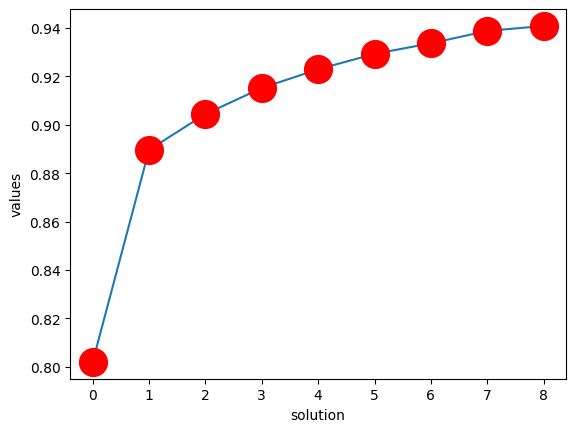

In [83]:
newlist=[]
x=history.history['accuracy']
y=history.history['val_accuracy']
ypoints = np.array(x)
xpoints=np.array(y)# naming the x axis
plt.xlabel('solution')# naming the y axis
plt.ylabel('values')
plt.plot(ypoints, marker='o', ms=20, mec='r', mfc='r')
plt.show()

# load_model & summary


In [48]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

# Prediction on the Validation Data

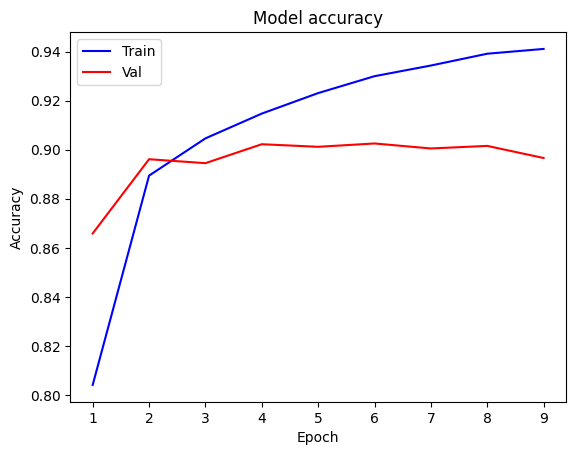

Loss Curve


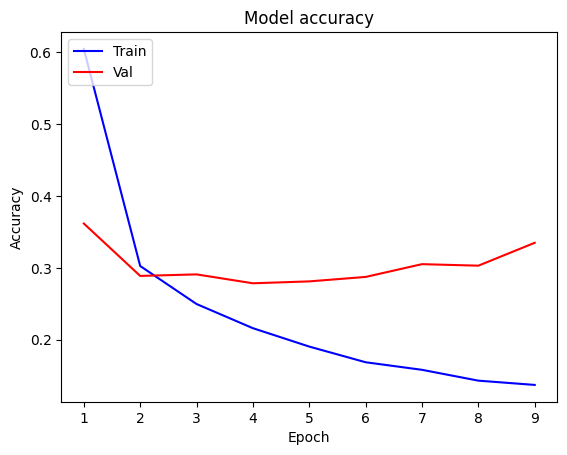

In [50]:
#def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1,len(acc)+1)
# Accuracy curve
# Accuracy curve
#plotgraph(epochs, acc, val_acc)
# loss curve
#print('Loss Curve')
#plotgraph(epochs, loss, val_loss)

In [49]:
y_pred = model.predict(x_val)
y_pred.shape

675/675 [==============================] - 7s 10ms/step


(21600, 36)

 # Validation Accuracy

In [90]:
val_acc = model.evaluate(x_val, y_val)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

675/675 [==============================] - 8s 11ms/step - loss: 0.2862 - accuracy: 0.8950
Loss value is  0.2861599922180176
Accuracy value is  0.8949999809265137


# Predicting the test data that came along with the dataset

In [91]:
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [92]:
test_df_new = test_df[test_df[0].isin(np.arange(10, 36))]
test_df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,10400.000000,10400.0,10400.0,10400.0,10400.0,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,...,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0
mean,22.500000,0.0,0.0,0.0,0.0,0.010962,0.035673,0.020385,0.016923,0.020385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.500361,0.0,0.0,0.0,0.0,0.710989,2.368003,1.417666,1.199698,2.039981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,16.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,22.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,29.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
x_test = test_df_new.loc[:, 1:]
y_test = test_df_new.loc[:, 0]
x_test.shape, y_test.shape

((10400, 784), (10400,))

In [94]:
x_test = np.apply_along_axis(flip_and_rotate, 1, x_test.values)
y_test = np_utils.to_categorical(y_test,number_of_classes)
x_test.shape, y_test.shape

((10400, 28, 28), (10400, 36))

In [95]:
x_test = x_test.astype('float32') / 255

In [96]:
x_test = x_test.reshape(-1, 28, 28, 1)#Reshaping (Changing Dimension)
x_test.shape

(10400, 28, 28, 1)

# Evaluating Model

In [9]:
test_acc = model.evaluate(x_test, y_test)

NameError: name 'x_test' is not defined

In [118]:
y_pred_test = model.predict(x_test)
y_pred_test.shape# Finding shape

325/325 [==============================] - 3s 10ms/step


(10400, 36)

In [8]:
plt.figure(figsize=(10, 6), dpi=80)# Visualising some predicted values
for i in range(100, 118):
    plt.subplot(3,6,i-99)#(nrow,ncol,shareX)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred_test[i].argmax()])

NameError: name 'plt' is not defined

In [5]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('my_model.h5')

def predict_Char(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])
    index=label_dictionary[res]
    return str(index), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognize", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        char, acc = predict_Char(im)
        self.label.configure(text= str(char)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

1/1 [==============================] - 0s 96ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Karim Ashraf\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_16616\1673879266.py", line 53, in classify_handwriting
    char, acc = predict_Char(im)
  File "C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_16616\1673879266.py", line 21, in predict_Char
    index=label_dictionary[res]
NameError: name 'label_dictionary' is not defined


1/1 [==============================] - 0s 30ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Karim Ashraf\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_16616\1673879266.py", line 53, in classify_handwriting
    char, acc = predict_Char(im)
  File "C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_16616\1673879266.py", line 21, in predict_Char
    index=label_dictionary[res]
NameError: name 'label_dictionary' is not defined
